# Lecture 7

Today: 
* Advanced: create a structured array.
* Advanced: vectorization for `NumPy` arrays.
* Vectorized implementation for common manipulations, such as convolution used in convolutional neural network.
* solve the linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$.

In [1]:
import numpy as np

## Structured Array
By default, we cannot concatenating different types of variables in an `ndarray` because `np.array` with a list as input only can have 1 type of variable. However, we can have a `dtype` option to specify the variable to make a **structured** array (technically an `ndarray` but quite different).

In [9]:
x_tst = np.arange(2)
print(x_tst)
x_tst.shape

[0 1]


(2,)

In [3]:
X_tst = np.array([[1,2], [3,4] ])
X_tst

array([[1, 2],
       [3, 4]])

In [22]:
X = np.array([(1, 2., 'Hello'), (2, 3., "World")],
              dtype=[('foo', 'i4'),('bar', 'f4'), ('baz', 'S10')])
# the 'foo', 'bar', 'baz' are the customized indices
# a10 can be S10
# the number after 'a' or 'S' is the max length of the string allowed

In [21]:
X

array([(1, 2., b'He'), (2, 3., b'Wo')],
      dtype=[('foo', '<i4'), ('bar', '<f4'), ('baz', 'S2')])

In [6]:
type(X)

numpy.ndarray

In [7]:
X.shape

(2,)

In [11]:
X[1]

(2, 3., b'World')

In [13]:
X

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('foo', '<i4'), ('bar', '<f4'), ('baz', 'S10')])

In [12]:
X['foo'] # foo is the most commonly used placeholder in programming
# the string 'foo' is now an index

array([1, 2])

In [15]:
X['baz']

array([b'Hello', b'World'], dtype='|S10')

In [14]:
X['bar']

array([2., 3.], dtype=float32)

In [23]:
X['foo'] *= 2 # same with X['foo'] = X['foo']*2
X

array([(2, 2., b'Hello'), (4, 3., b'World')],
      dtype=[('foo', '<i4'), ('bar', '<f4'), ('baz', 'S10')])

In [24]:
X['bar'] += 3.14
X

array([(2, 5.1400003, b'Hello'), (4, 6.1400003, b'World')],
      dtype=[('foo', '<i4'), ('bar', '<f4'), ('baz', 'S10')])

Python 3 uses unicode, and marks bytestrings with this `b`.
<br><br>
Reference: [https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html#string-dtype-note](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html#string-dtype-note)

In [25]:
Y = np.array([(1, 2., 'Hello'), (2, 3., "World")],
              dtype='i4, f4, S6')
# Y is the same with X without customized indices

In [27]:
Y[0]

(1, 2., b'Hello')

### We want to avoid the following type of assignment

In [29]:
# what happens if we do not specify the dtype?
Y = np.array([(1, 2., 'Hello'), (2, 3., "World")])
print(Y)
# if we give numpy an array of mixed type
# numpy converts it to whatever is the "most convenient"

[['1' '2.0' 'Hello']
 ['2' '3.0' 'World']]


In [30]:
type(Y[0,0])

numpy.str_

In [32]:
Z = np.array((1, 2., 'Hello'))
print(Z)
# we can google "Does numpy convert tuple to array?"

['1' '2.0' 'Hello']


The options `dtype` can be:
> b1, i1, i2, i4, i8, u1, u2, u4, u8, f2, f4, f8, c8, c16, a
    
which are bytes, ints, unsigned ints, floats, complex and fixed length strings of specified byte lengths)
<br><br>
Reference: for more please check [https://docs.scipy.org/doc/numpy-1.10.4/user/basics.rec.html](https://docs.scipy.org/doc/numpy-1.10.4/user/basics.rec.html)

# Vectorization:

In [40]:
# guess what will happen?
arr = np.zeros([3,3])
print(arr)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [41]:
# example of non-vectorized implementation
arr1 = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        arr1[i,j] += 1

print(arr1)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [42]:
arr = arr + 1 # vectorized implementation without any for loop
# 1 is plussed to each element of arr
print(arr)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Now `*` works like a tensor product (element-wise product) for matrix.

In [44]:
print(arr*(arr+1))

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [45]:
def f(x):
    return x*x + x + 1 # x^2 + x + 1

In [46]:
f(arr)    # again this would never work for lists

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

**Remark**: for library functions (not user defined like above) you may need to use a function called `vectorize`.

In [47]:
def g(x):
    if x > 0:
        return x*x + x + 1 # x^2 + x + 1

In [ ]:
g(arr) # g is non-vectorized, numpy gives us error

In [49]:
np.vectorize(g)(arr)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [50]:
arr = np.array(range(9)).reshape(3,3) + 1 # no for loop

In [51]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Convolution in 2D using a filter (Optional Reading)

Suppose we have a big matrix `A` and a small filter matrix (called Kernel) `K`:
<img src="convolution1.JPG" alt="Convolution" width="500"/>
It is adding up the element-wise product of every 3 by 3 block in the big matrix `A` with the kernel `K`:
<img src="convolution2.JPG" alt="Convolution" width="700"/>

In [ ]:
### import numpy as np
A = np.random.randint(90,110, size=(12,10))
K = np.array([[0, -1, 0 ], [-1, 5, -1], [0, -1, 0]])
conv = np.zeros((10,8))
dim = conv.shape
print("A = \n", A)
print()
print("The shape of A after being convolved with a 3x3 kernel is ", conv.shape)

In [ ]:
A[0:3,0:3]*K

In [ ]:
conv[0,0] = np.sum(A[0:3,0:3]*K)
conv

In [ ]:
width, height = dim[0], dim[1]

for i in range(width):
    for j in range(height):
        conv[i,j] = np.sum(A[i:i+3,j:j+3]*K)
        
print(conv)

Now we rewrite above script into a function.

In [ ]:
def myConvolve(A,K):
    # insert code here

# Solving linear system
Now let us consider when $m=n$, we want to solve a system of linear equations:
$$\mathbf{A} \mathbf{x} = \mathbf{b},$$
which is
$$\left\{
\begin{aligned} a_{11}x_{1}+a_{12}x_{2}+\cdots +a_{1n}x_{n}&=b_{1}\\a_{21}x_{1}+a_{22}x_{2}+\cdots +a_{2n}x_{n}&=b_{2}\\&\ \ \vdots \\a_{n1}x_{1}+a_{n2}x_{2}+\cdots +a_{nn}x_{n}&=b_{n}.\end{aligned}
\right.
$$
The number of unknowns is the same with the number of equations.
Instead of manual implementing the pivoting process using `for` loops, we can use the Linear Algebra routines `numpy.linalg` in NumPy, and later using `scipy.linalg` in SciPy (a comprehensive scientific computing library).

<br><br>
Reference: [https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

In [52]:
# import the linear algebra routines
import numpy as np
from numpy import linalg as LA
# if not you have to compute rank you have to use numpy.linalg.matrix_rank()

In [ ]:
LA. # press Tab after the dot

In [53]:
# first we have to check the rank
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
LA.matrix_rank(A)

2

In [55]:
A = np.array([[2,-1,1],[1,2,-1],[0,-1,2]])
print(A)
LA.matrix_rank(A) 

[[ 2 -1  1]
 [ 1  2 -1]
 [ 0 -1  2]]


3

In [56]:
b = np.array([1,1,1])
x = LA.solve(A,b)
x

array([0.42857143, 0.71428571, 0.85714286])

## What about using inverse of a matrix

In [57]:
# inverse
Ainv = LA.inv(A)
print(Ainv)

[[ 0.42857143  0.14285714 -0.14285714]
 [-0.28571429  0.57142857  0.42857143]
 [-0.14285714  0.28571429  0.71428571]]


In [60]:
A_tst = np.arange(9)+1
A_tst = A_tst.reshape(3,3)
LA.inv(A_tst) # the result blows up because A_tst is singular (rank 2)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [62]:
# check
np.matmul(A,Ainv)
np.matmul(Ainv,A)

array([[ 1.00000000e+00, -2.77555756e-17, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16,  1.00000000e+00]])

### Other common function in linear algebra

In [63]:
LA.det(A_tst)

-9.51619735392994e-16

In [64]:
LA.det(A)

7.000000000000001

In [67]:
eigvals, eigvecs = LA.eig(A) # eigenvalue and eigenvectors
print(eigvals)

[2.5+0.8660254j 2.5-0.8660254j 1. +0.j       ]


In [68]:
D = np.diag([1,2,3])
D

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [69]:
w, v = LA.eig(D)

In [70]:
print(w) # eigenvalue, avoid using lambda!!!!!

[1. 2. 3.]


In [71]:
print(v) # every column of v is the corresponding eigenvector of w

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Optional reading: Fractals using numpy's complex numbers

Reference: [https://en.wikipedia.org/wiki/Mandelbrot_set#Formal_definition](https://en.wikipedia.org/wiki/Mandelbrot_set#Formal_definition)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

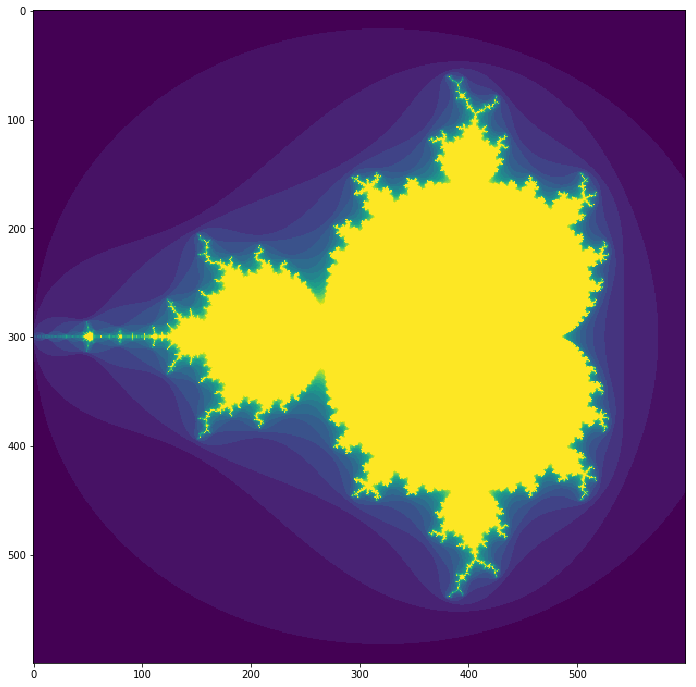

In [2]:
def mandelbrot( h,w, maxit=20 ):
    # Returns an image of the Mandelbrot fractal of size (h,w).
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime


fig, ax = plt.subplots(1, figsize=(12, 12))
plt.imshow(mandelbrot(600,600))
plt.show()